## Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm 
import matplotlib.pyplot as plt

# seaborn 可视为 matplotlib 的增强版，而不是替代版，结合使用更好

In [2]:
# 加载数据

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# save 'Id' column

train_id = train['Id']
test_id = test['Id']

# drop the 'id' column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# check size of dataset
print('The train size after drop Id column is: {}'.format(train.shape))
print('The test size after drop Id column is: {}'.format(test.shape))

The train size after drop Id column is: (1460, 80)
The test size after drop Id column is: (1459, 79)


## Target Variable

In [6]:
print(train['SalePrice'].isnull().sum())

0


 mu = 180921.20 and sigma = 79415.29



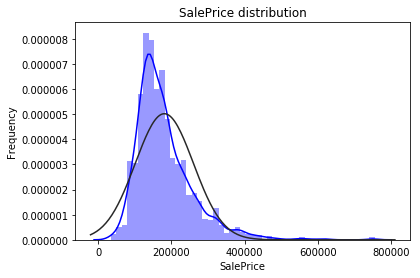

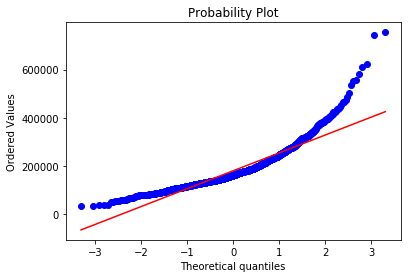

In [7]:
# 正态分布概率密度函数拟合
sns.distplot(train['SalePrice'], fit = norm, color='b')

# 求期望值和标准差
mu, sigma = norm.fit(train['SalePrice'])
print( ' mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.xticks = range(0, 800001, 200000)

# 画QQ查看数据是否服从正态分布，如果是，则QQ图会在一条直线上拟合得比较好
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

plt.show()

使用 numpy.log1p() 而不使用 numpy.log()，是因为 log1p() 可以预防 0 值。

In [8]:
train['SalePrice'] = np.log1p(train['SalePrice']) 

 mu = 12.02 and sigma = 0.40



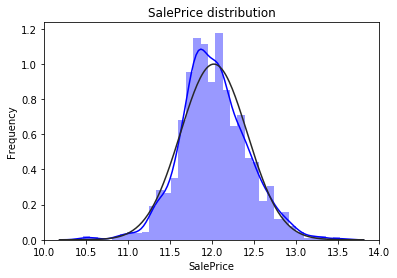

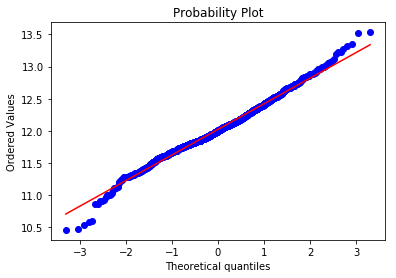

In [9]:
# 正态分布概率密度函数拟合
sns.distplot(train['SalePrice'], fit = norm, color='b')

# 求期望值和标准差
mu, sigma = norm.fit(train['SalePrice'])
print( ' mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.xticks = range(0, 800001, 200000)

# 画QQ查看数据是否服从正态分布，如果是，则QQ图会在一条直线上拟合得比较好
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

plt.show()

## Features engineering

### Outliers

查看连续变量的离群值

In [10]:
num_feature = [x for x in train.columns if train[x].dtypes != 'O']

print('The number of numerical features is: {}'.format(len(num_feature)))

The number of numerical features is: 37


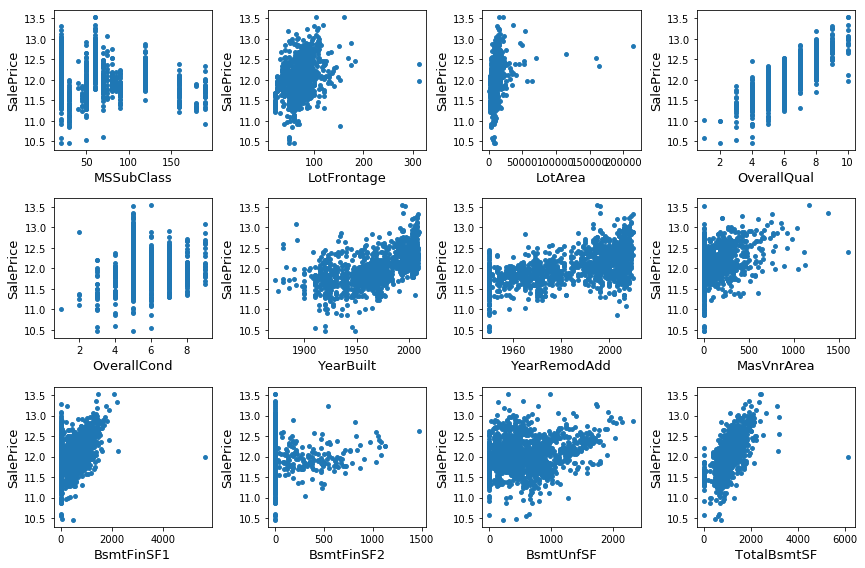

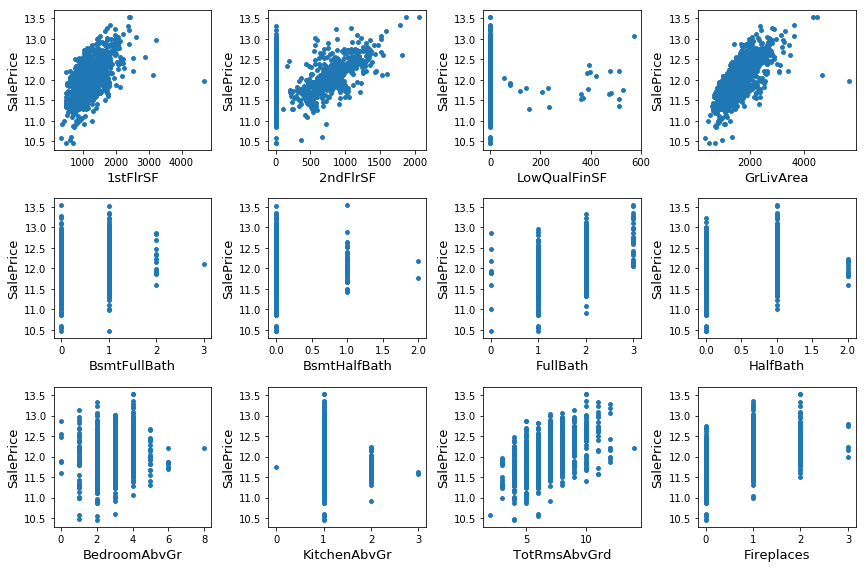

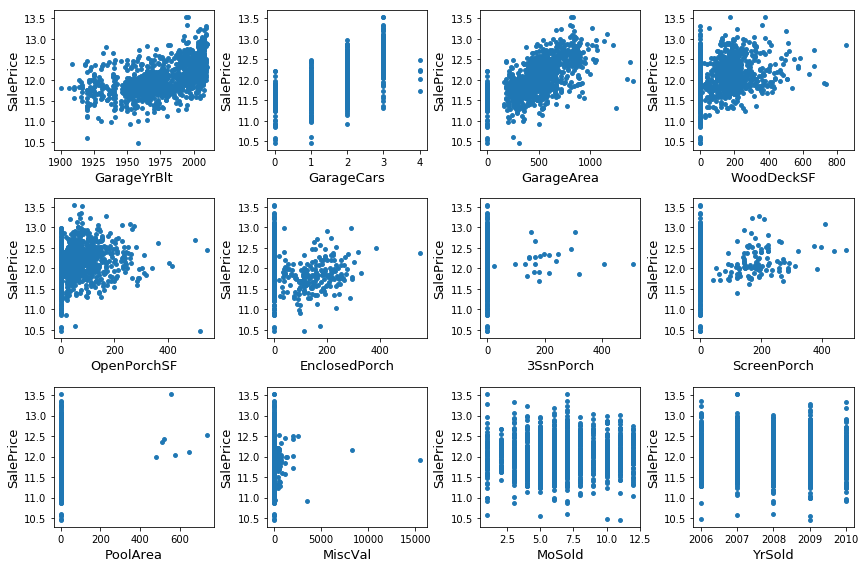

In [11]:
# 画散点图，使用3个画布，每个画布上画12个子图。也可以只用一个画布，注意调整大小间距即可。  

fig1 = plt.figure(figsize=(12, 8))        # figsize 参数逐步调整到满意为止
fig2 = plt.figure(figsize=(12, 8))
fig3 = plt.figure(figsize=(12, 8))
for i, fea in enumerate(num_feature[ : -1]):    # -1 是不取最后一列 SalePrice
    if i < 12:
        x = fig1.add_subplot(3, 4, i + 1)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)    # s 调整点的大小
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)
    elif i < 24:
        x = fig2.add_subplot(3, 4, i - 11)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)
    else:
        x = fig3.add_subplot(3, 4, i - 23)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

plt.show()

主要留意一下较明显的离群值，比如：TotalBsmtSF，1stFlrSF，GrLivArea 等变量，不确定或不明显的不要管。

Delete outlier of TotalBsmtSF

In [12]:
train.drop(train[(train['TotalBsmtSF'] > 4000) & (train['TotalBsmtSF'] < 300000)].index, inplace=True)

再次运行上面的绘图代码，可以发现 1stFlrSF 的那个离群值也被删除了，但 GrLivArea 还存在一个，需要删除。

In [13]:
train.drop(train[(train['GrLivArea'] > 4500) & (train['GrLivArea'] < 300000)].index, inplace=True)

- **删除样本之后，需要重置索引，这一步很重要。**

In [14]:
# 删除之后，索引需要重置

train.reset_index(drop=True, inplace=True)

In [15]:
# check the data size after delete outlier

print('The train size  is: {}'.format(train.shape))
print('The test size   is: {}'.format(test.shape))

The train size  is: (1458, 80)
The test size   is: (1459, 79)


### Missing Value

处理缺失值，建议同测试集一起处理，这样比较方便，也是删除样本之后需要重置index的原因。

In [16]:
n_train = train.shape[0]
n_test = test.shape[0]

target = train['SalePrice']

all_data = pd.concat([train, test], ignore_index=True)

# 删除目标变量
all_data.drop('SalePrice', axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


定义一个函数描述缺失情况

In [17]:
def des_na(dataframe, ratio=0):
    """返回缺失比例小于 ratio 的变量情况"""
    
    na_count = dataframe.isnull().sum().sort_values(ascending=False)                # 计算缺失值的个数
    na_rate = na_count/dataframe.shape[0]                                           # 计算缺失值的比率
    dtype = dataframe.dtypes
    na_data = pd.concat([na_count,na_rate, dtype],axis=1,keys=['count','ratio', 'dtype'])           # 组合一个新的缺失值的数据框
    
    return na_data[na_data['ratio'] > ratio].sort_values('count', ascending=False)

In [18]:
des_na(all_data, 0)

,count,ratio,dtype
PoolQC,2908,0.996915,object
MiscFeature,2812,0.964004,object
Alley,2719,0.932122,object
Fence,2346,0.804251,object
FireplaceQu,1420,0.486802,object
LotFrontage,486,0.166610,float64
GarageCond,159,0.054508,object
GarageQual,159,0.054508,object
GarageYrBlt,159,0.054508,float64
GarageFinish,159,0.054508,object


delete features that miss_ratio > 0.9

In [19]:
del_col = des_na(all_data, 0.9).index

all_data.drop(del_col, axis=1, inplace=True)

- **Fence**

    根据描述得知，“NA” 表示没有栅栏，这里可以直接填充一个字符串 “NA”

In [20]:
all_data.Fence.fillna('NA', inplace=True)

- **FireplaceQu**

    根据描述得知，“NA” 表示没有壁炉，填充字符串 “NA”

In [21]:
all_data.FireplaceQu.fillna('NA', inplace=True)

- **LotFrontage	**

    根据描述得知，它是——房子同街道之间的距离，参考老外的kernel得知，它和 Neighborhood 变量息息相关，因此它的填充值是：
    
    按 Neighborhood 值分组之后填充组内的中位数

In [22]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- **GarageCond, GarageQual, GarageFinish, GarageType, GarageYrBlt**

    根据描述得知，“NA” 表示没有车库，因此前个变量填充字符串“NA”，而 GarageYrBlt 填充 0。

In [23]:
for col in ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']:
    all_data[col].fillna('NA', inplace=True)
    
all_data['GarageYrBlt'].fillna(0, inplace=True)

- **GarageArea, GarageCars**

    同理：没有车库，所以填充 0 。

In [24]:
for col in ['GarageArea', 'GarageCars']:
    all_data[col].fillna(0, inplace=True)

- **BsmtExposure, BsmtCond, BsmtQual, BsmtQual, BsmtFinType1**

    根据描述得知，以 "Bsmt" 开头的，缺失则表示没有车库，因此这些变量填充“NA”。

In [25]:
for col in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_data[col].fillna('NA', inplace=True)

- **BsmtHalfBath, BsmtFullBath, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1**

    同上理：数值型的变量则填充 0 。

In [26]:
for col in ['BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF']:
    all_data[col].fillna(0, inplace=True)

- **MasVnrType, MasVnrArea**

    根据描述得知，缺失有可能意味着没有 Masonry veneer，因此一个填充 “NA”，一个填充 0 。

In [27]:
all_data['MasVnrType'].fillna('NA', inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)

- **MSZoning, Functional, Utilities, Electrical, Exterior1st, Exterior2nd, KitchenQual, SaleType** 

    根据描述得知，他们可以填充频数最多的那个值。

In [28]:
for col in ['MSZoning','Functional','Utilities','Electrical','Exterior1st','Exterior2nd','KitchenQual', 'SaleType']:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [29]:
des_na(all_data, 0)

,count,ratio,dtype


### Add new features

In [30]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [31]:
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

In [32]:
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5*all_data['HalfBath']) + 
                               all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']))

In [33]:
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                             all_data['WoodDeckSF'])

In [34]:
all_data['House_age'] = 2018 - all_data['YearBuilt']

In [35]:
all_data['RemodAdd_age'] = 2018 - all_data['YearRemodAdd']

In [36]:
all_data['Sold_age'] = 2018 - all_data['YrSold']

### More features engeneering

将一些实际意义为类别型的数值变量转换成类别变量

In [37]:
# all_data['YearBuilt'] = all_data['YearBuilt'].astype('str')
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype('str')
# all_data['YrSold'] = all_data['YrSold'].astype('str')

In [38]:
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                               "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                           7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                              })

将存在等级关系的变量转成数值，并保留等级关系。

In [39]:
map_ship = {'LotShape': {'Reg': 4,'IR1': 3,'IR2': 2, 'IR3': 1, 'NA': 0},    # 规则程度依次下降
            'LandContour': {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1, 'NA': 0},    # 平坦程度
            'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 外部材料质量
            'ExterCond' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 外部材料的现状
            'BsmtQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 地下室的高度
            'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 地下室的一般评级
            'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},    # 地下室透光评级
            'BsmtFinType1' : {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
            'HeatingQC' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'CentralAir' : {'Y': 2, 'N': 1, 'NA': 0},
            'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'GarageFinish' : {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
            'GarageQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
            }

In [40]:
all_data = all_data.replace(map_ship)

In [41]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 83)


### Skewed features

In [337]:
skew_feats = all_data.skew().sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skew_feats})
skewness

,Skew
MiscVal,21.950962
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131
BsmtHalfBath,3.932018


In [338]:
from scipy.special import boxcox1p

skewness = skewness[skewness > 0.5]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

### Feature Selection

本来这里做了特征选择的，但后面发现不做选择的效果要更好，因此，上传的kernel就把这部分给删除了。

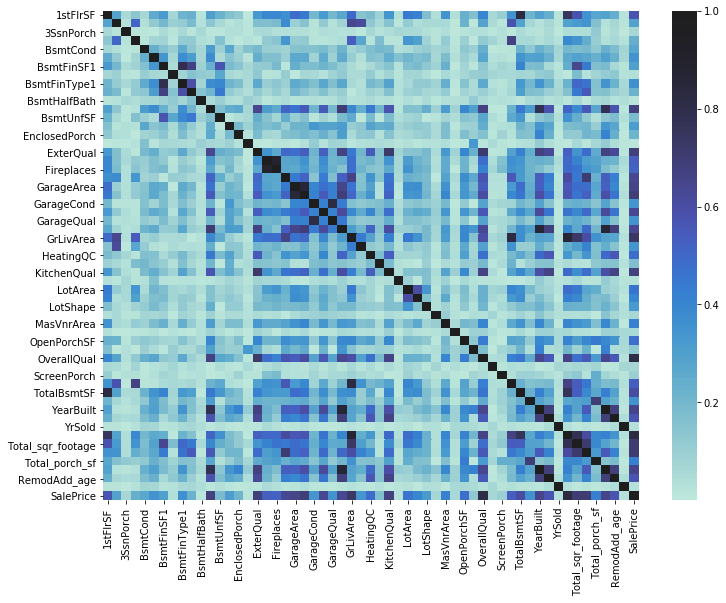

In [42]:
# 相关性分析

corrmat = all_data.iloc[:n_train, ].join(target).corr('spearman')

plt.figure(figsize=(12,9))

# 绘制热力图
sns.heatmap(np.fabs(corrmat), square=False, center=1)            # 此处取了绝对值

plt.xticks = corrmat.index
plt.yticks = corrmat.columns

plt.show()

In [43]:
# 找出弱相关的数值变量——低于 0.2

weak_num_feature = corrmat.SalePrice[abs(corrmat.SalePrice) < 0.2].index

In [44]:
all_data.drop(weak_num_feature, axis=1, inplace=True)

In [45]:
factor = [col for col in all_data.columns if all_data[col].dtypes == 'O']  # 注意这个单词 Object 的首字母，而不是数字零。
print(len(factor))
print(factor)

27
['BldgType', 'BsmtFinType2', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Functional', 'GarageType', 'Heating', 'HouseStyle', 'LandSlope', 'LotConfig', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [46]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

a = '+'.join(factor)
formula = 'SalePrice~ %s' % a
# x_y = pd.concat([train, target], axis=1)
anova_results = anova_lm(ols(formula, all_data.iloc[:n_train, ].join(target)).fit())

anova_results.sort_values(by='PR(>F)')

D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
Foundation,5.0,27.040414,5.408083,153.734900,6.070044e-128
Exterior1st,14.0,27.012578,1.929470,54.848801,7.646894e-120
GarageType,6.0,21.510337,3.585056,101.911946,6.935014e-105
Neighborhood,24.0,21.586876,0.899453,25.568644,1.341086e-91
Electrical,4.0,15.849525,3.962381,112.638119,2.673690e-82
MasVnrType,4.0,11.731051,2.932763,83.369281,6.122739e-63
BldgType,4.0,9.342803,2.335701,66.396678,4.472785e-51
BsmtFinType2,6.0,7.802723,1.300454,36.967838,1.773591e-41
Condition1,8.0,8.057003,1.007125,28.629426,2.845369e-41
MSZoning,4.0,6.798756,1.699689,48.316845,7.069739e-38


In [47]:
# 找出弱相关的类别变量

weak_cat_feature = anova_results[anova_results['PR(>F)'] > 0.05].index

In [48]:
all_data.drop(weak_cat_feature, axis=1, inplace=True)

In [49]:
print('all_data size is: {}'.format(all_data.shape))

all_data size is: (2917, 65)


### Getting dummy categorical features

这个虚拟变量和one-hot编码是一样的，但这个比one-hot要好用，而且自动识别类别型变量。

In [50]:
all_data = pd.get_dummies(all_data)

In [51]:
print('all_data size after get_dummies is: {}'.format(all_data.shape))

all_data size after get_dummies is: (2917, 227)


删除包含 95% 以上的 0 或者 1 的变量

In [52]:
# 通过这个得知，编码过的变量类型都是 uint8

set(all_data.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64')}

In [53]:
for each in all_data.columns:
    if all_data[each].dtype == 'uint8':
        ra = all_data[each].sum()/all_data[each].count()
        if ra > 0.95 or ra < 0.05:
            all_data.drop(each, axis=1, inplace=True)

In [54]:
print('all_data size is: {}'.format(all_data.shape))

all_data size is: (2917, 99)


### Split train and test data from all_data

In [55]:
# 分离数据

train = all_data.iloc[:n_train, ]
test = all_data.iloc[n_train:, ]

print('train size is: {}'.format(train.shape))
print('test size is: {}'.format(test.shape))

train size is: (1458, 99)
test size is: (1459, 99)


## Modelling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [57]:
train_x, test_x, train_y, test_y = train_test_split(train, target, test_size=0.2, random_state=0)

### Evaluation

In [58]:
def model_rmse(model):
    model.fit(train_x, train_y)
    pre_test = model.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, pre_test))
    return rmse

In [68]:
# define cross validation strategy

from sklearn.model_selection import cross_val_score

def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error"))
    return rmse

### Base models

使用网格搜索之后，模型会自动使用最佳参数去调用模型。

- **Lasso**

In [63]:
params = {'alpha': [0.00005, 0.0001, 0.0005, 0.0006, 0.001, 0.005]}

lasso = GridSearchCV(estimator=Lasso(), param_grid=params,scoring='neg_mean_squared_error')

In [70]:
print(model_rmse(lasso))
print(rmse_cv(Lasso(alpha=0.0005), train_x, train_y).mean())

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

0.114461142913
0.125363605749


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [358]:
lasso.best_params_

{'alpha': 0.0005}

- **Ridge**

In [359]:
params = {'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]}

ridge = GridSearchCV(estimator=Ridge(), param_grid=params,scoring='neg_mean_squared_error')

In [360]:
model_rmse(ridge)

0.11815181184552648

In [361]:
ridge.best_params_

{'alpha': 4.0}

- **KernelRidge**

In [362]:
params = {'alpha': [1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 14.0, 15.0, 16.0]}

kernel_ridge = GridSearchCV(estimator=KernelRidge(), param_grid=params,scoring='neg_mean_squared_error')

In [363]:
model_rmse(kernel_ridge)

0.11836857932398394

In [364]:
kernel_ridge.best_params_

{'alpha': 5.0}

- **ElasticNetCV**

In [365]:
elastic_net = ElasticNetCV()

In [366]:
model_rmse(elastic_net)

0.11706446154138465

- **RandomForestRegressor**

In [367]:
# 网格搜索太慢了，慎重运行。

# params = {'n_estimators': [500, 1000, 1500, 2000, 2500, 3000],
#           'min_samples_split': [2, 4, 6, 8, 10, 15],
#           'min_samples_leaf':[1, 2, 3, 4, 5, 6],
#           'random_state': [1, 2, 3, 4, 5]}

# rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params,scoring='neg_mean_squared_error', cv=5)

In [368]:
rfr = RandomForestRegressor(n_estimators=2000, random_state=1)

In [369]:
model_rmse(rfr)

0.12171037774453959

- **GradientBoostingRegressor**

In [370]:
# 网格搜索太慢，慎重运行。

# params = {'n_estimators': [500, 1000, 1500, 2000, 2500, 3000],
#           'learning_rate': [0.01, 0.05, 0.1, 0.5]}

# GBoost = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params,scoring='neg_mean_squared_error')

In [371]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=2)

In [372]:
model_rmse(GBoost)

0.11991784820289404

In [373]:
# GBoost.best_params_

- **XGBoost**

In [374]:
xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [375]:
model_rmse(xgboost)

0.11430408526328624

- **LightGBM**

In [376]:
lgbm = lgb.LGBMRegressor(objective='regression', learning_rate=0.01, n_estimators=1000,random_state=4,
                         max_bin = 55, bagging_fraction = 0.8,
                         bagging_freq = 5, feature_fraction = 0.2319,
                         feature_fraction_seed=9, bagging_seed=9,
                         min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [377]:
model_rmse(lgbm)

0.11280443764175345

## Model Ensemble

### Stacking

In [271]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class StackingModel(BaseEstimator, TransformerMixin, RegressorMixin):

    def __init__(self, base_models, meta_model, ford=KFold,
                 n_splits=3, shuffle=False, random_state=None):
        self.base_models = base_models
        self.meta_model = meta_model
        self.k_ford = ford
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.base_models_ = [list() for i in self.base_models]
        kford = self.k_ford(n_splits=self.n_splits,
                            shuffle=self.shuffle,
                            random_state=self.random_state)
        sec_train = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, test_index in kford.split(X, y):
                clo_model = clone(model)
                clo_model.fit(X[train_index, ],  y[train_index, ])
                self.base_models_[i].append(clo_model)
                sec_train[test_index, i] = clo_model.predict(X[test_index,])
        self.meta_model.fit(sec_train, y)
        return self

    def predict(self, X):
        X = np.array(X)
        sec_test = np.zeros((X.shape[0], len(self.base_models)))
        for i, models_ in enumerate(self.base_models_):
            y = np.zeros((X.shape[0], len(models_)))
            for j, mod in enumerate(models_):
                y[:, j] = mod.predict(X)
            sec_test[:, i] = y.mean(axis=1)
        predictions = self.meta_model.predict(sec_test)
        return predictions

In [272]:
base_models = [ridge, elastic_net, GBoost]
meta_model = lasso

In [273]:
stackmodel = StackingModel(base_models=base_models, meta_model=meta_model, 
                           n_splits=2, shuffle=True, random_state=5)

In [274]:
model_rmse(stackmodel)

0.10054642889562301

### Weighted average

这就是玄学给权重了，多次尝试让效果达到最好，权重之和为 1.0 。

In [378]:
stack_pre = lasso.predict(test_x) * 0.2 + ridge.predict(test_x) * 0.1 + elastic_net.predict(test_x) * 0.2 + \
            GBoost.predict(test_x) * 0.2 + xgboost.predict(test_x) * 0.2 + lgbm.predict(test_x) * 0.1
            
error = np.sqrt(mean_squared_error(test_y, stack_pre))

print(error)

0.11061538967


## Final Prediction

In [379]:
pre = lasso.predict(test) * 0.2 + ridge.predict(test) * 0.1 + elastic_net.predict(test) * 0.2 + \
            GBoost.predict(test) * 0.2 + xgboost.predict(test) * 0.2 + lgbm.predict(test) * 0.1

pre_true = np.exp(pre) - 1

sub = pd.DataFrame({'Id': test_id.values, 'SalePrice':pre_true})

sub.to_csv('../input/submission.csv', index=False)

提交结果发现，模型过拟合，训练得分减少了，但上传结果的得分却增加了。